<a href="https://colab.research.google.com/github/wisdomscode/AI-Lab-Deep-Learning-PyTorch/blob/main/AI_Lab_Project_6_Social_Media_Marketing_at_WQU_6_2_Stable_Diffusion_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stable Diffusion Pipelines


We'll start by importing the same libraries as before, and also defining the device and correct type.

In [ ]:
import sys

import diffusers
import matplotlib.pyplot as plt
import torch
import transformers
from IPython.display import display
from PIL import Image
from torchinfo import summary
from tqdm.notebook import tqdm

In [ ]:
if torch.cuda.is_available():
    device = "cuda"
    dtype = torch.float16
else:
    device = "cpu"
    dtype = torch.float32

print(f"Using {device} device with {dtype} data type.")

We'll use the same prompt as before:

In [ ]:
prompt = "A red bird flies through a blue sky over a green tree."

If this seems like a lot of work to run Stable Diffusion, you're not alone.  That's why the `StableDiffusionPipeline` was created.  It incorporates all of these steps into a single pipeline object.

In [ ]:
pipeline = diffusers.StableDiffusionPipeline.from_pretrained(
    "CompVis/stable-diffusion-v1-4", torch_dtype=dtype
)
pipeline.to(device)

print(pipeline)

You can call it with a prompt, and it returns a container with a list of images.

In [ ]:
res = pipeline(prompt)

print(res)
print(len(res.images))
# Display the first (and only, in this case) image
display(res.images[0])

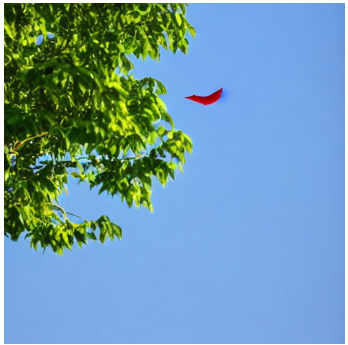

In addition to taking a single prompt as input, the pipeline accepts a list of prompts and generates an image for each.  By passing the same prompt in multiple times, we can use this to generate several candidate images.

**Task 6.2.20:** Generate four images for our prompt using the pipeline.  We've provided code that will display all of them.

To reduce the VRAM consumption and avoid "Out of Memory" problems, we'll reduce the size of the desired images:

In [ ]:
# Create a list containing the prompt four times and pass it to the pipeline.
images = pipeline([prompt] * 4).images

for im in images:
    display(im)

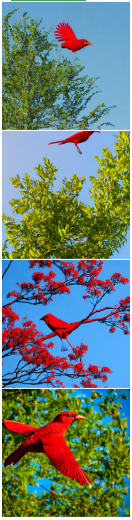

The `pipeline` takes a `guidance_scale` argument.  Small values let the model be more creative, and larger values make it hew more closely to the prompt.  The default value is 7.5.

**Task 6.2.21:** Generate images at small guidance scale (2) and large guidance scale (25) values.

In [ ]:
small_guidance = pipeline(prompt, guidance_scale=2).images[0]
large_guidance = pipeline(prompt, guidance_scale=25).images[0]

print("Small guidance")
display(small_guidance)
print("Large guidance")
display(large_guidance)

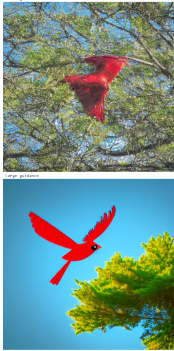

<div class="alert alert-info" role="alert">
The behavior at different guidance levels becomes more apparent as you see more examples.  You may wish to run the above cell several times.  Alternatively, you can alter it to produce several images at each guidance level.
</div>

We can also adjust the number of denoising steps, with the `num_inference_steps` parameter.  The default is 50 steps.

**Task 6.2.22:** Run the pipeline with only a few (10) and with many (250) steps.

In [ ]:
few_steps = pipeline(prompt, num_inference_steps=10).images[0]
many_steps = pipeline(prompt, num_inference_steps=250).images[0]

print("Few steps")
display(few_steps)
print("Many steps")
display(many_steps)

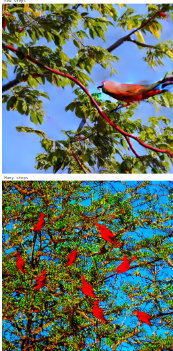

These models tend to be trained on images from sites like Flickr and DeviantArt.  The text descriptions are assembled from summaries, comments, and tags assigned to the images.  That last component means that the training descriptions often consist of a series of keywords, rather than a coherent paragraph about the image.

Our prompts will perform best when they resemble the training data.  Many people have had success by creating prompts that contain lists of keywords and tags that reflect the style they desire.  Here are a couple of different sets of style keywords.

In [ ]:
styles = [
    # A cartoon in Studio Ghibli style
    "cartoon, animated, Studio Ghibli style, cute, Japanese animation",
    # A photograph on film suggests an artistic approach
    "photograph, film, 35 mm camera",
    # A computer rendering.  The "arguments" at the end don't directly
    # affect the image, but they make the model adjust the image to
    # look like images tagged with these arguments.
    "rendered in unreal engine, hyper-realistic, volumetric lighting, --ar 9:16 --hd --q 2",
    # A watercolor painting
    "painting, watercolors, pastel, composition",
    # Add your own, too!
]

We can steer the model towards our style by adding these to our prompt.  For example, to generate our bird in a cartoon style, we could do:

In [ ]:
styled_prompt = f"{prompt} {styles[0]}"
image = pipeline(styled_prompt).images[0]

print(styled_prompt)
display(image)

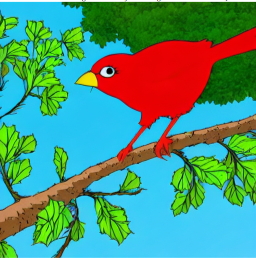

**Task 6.2.23:** Generate an image using our prompt and each of these styles.

In [ ]:
styled_prompts = [f"{prompt} {styles}" for style in styles]
images = pipeline(styled_prompts).images

for p, i in zip(styled_prompts, images):
    print(p)
    display(i)

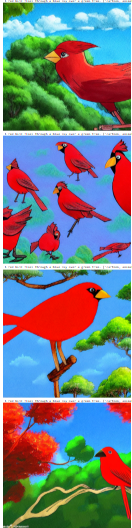

**Conclusion**

Hopefully you've created some interesting images in this lesson. You'll generally want to use the StableDiffusionPipeline, rather that running all of the steps by hand. But the process of doing the steps individually has taught us: - How to generate tokens and text embeddings from raw text. - How to decode latent vectors to an image with a VAE. - How to perform denoising diffusion. - How condition models weigh their prompts. - How a scheduler improves the output of denoising diffusion.

There are many resources on the Internet that will help you use Stable Diffusion. This [blog post from HuggingFace](https://huggingface.co/blog/stable_diffusion) walks through many of the steps from this lesson, and the [Stable Diffusion documentation from the diffusers library](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/overview) is quite good. There are also a number of sites you can find that suggest prompts for Stable Diffusion. These are often helpful, but keep in mind that they may be written for a different version of the model than you're using.